In [ ]:
!pip install kaggle



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karandeep98/real-life-violence-and-nonviolence-data")

print("Path to dataset files:", path)


100%|██████████| 662M/662M [00:09<00:00, 75.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/karandeep98/real-life-violence-and-nonviolence-data/versions/1


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Correct the path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/karandeep98/real-life-violence-and-nonviolence-data/versions/1'

# The dataset has only 'violence' and 'nonviolence' folders.
# We will treat this folder as the training directory.
train_dir = dataset_path  # Points to the folder containing both 'violence' and 'nonviolence'

# Preprocessing data
train_datagen = ImageDataGenerator(
    rescale=1./255,    # Rescale pixel values
    validation_split=0.2  # Reserve 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,                       # Points to the main directory containing 'violence' and 'nonviolence'
    target_size=(150, 150),           # Resize all images to 150x150
    batch_size=32,                    # Load in batches of 32 images
    class_mode='binary',              # Binary classification (violent vs non-violent)
    subset='training'                 # Specify this is training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'               # Specify this is validation data
)

# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)

# Save the model
model.save('violence_detection_model.h5')


Found 8851 images belonging to 1 classes.
Found 2212 images belonging to 1 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/277 ━━━━━━━━━━━━━━━━━━━━ 52s 130ms/step - accuracy: 0.9784 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 2.0455e-14
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 72s 127ms/step - accuracy: 1.0000 - loss: 1.9394e-13 - val_accuracy: 1.0000 - val_loss: 2.0453e-14
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 39s 121ms/step - accuracy: 1.0000 - loss: 1.4187e-12 - val_accuracy: 1.0000 - val_loss: 2.0450e-14
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 31s 109ms/step - accuracy: 1.0000 - loss: 4.0028e-13 - val_accuracy: 1.0000 - val_loss: 2.0449e-14
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 1.0000 - loss: 1.7448e-12 - val_accuracy: 1.0000 - val_loss: 2.0441e-14
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 29s 104ms/step - accuracy: 1.0000 - loss: 1.9593e-11 - val_accuracy: 1.0000 - val_loss: 2.0429e-14
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 30s 106ms/step - accuracy: 1.0000 - loss: 5.4652e-11 - val_accuracy: 1.0000 - val_loss: 2.0356e-14
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 41

70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 1.0000 - loss: 3.4915e-15
Validation Loss: 2.0350181704153168e-14
Validation Accuracy: 1.0


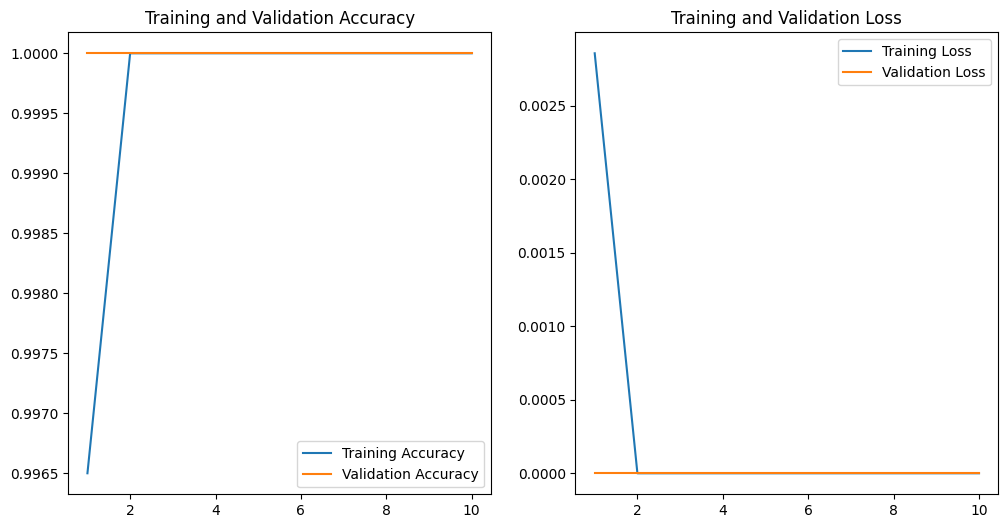

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Save the model in the new recommended Keras format
model.save('violence_detection_model.keras')

# Plotting the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 11)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
# Example using Data Augmentation (In ImageDataGenerator)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,          # Random rotations (up to 20 degrees)
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    shear_range=0.2,           # Shear transformations
    zoom_range=0.2,             # Zoom
    horizontal_flip=True,       # Random horizontal flips
    fill_mode='nearest',        # Fill in missing pixels (during transformations)
    validation_split=0.2
)

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('/content/violence_detection_model.keras')

# Predict function to classify new images
def predict_image(img_path):
    img = image.load_img("/content/vlcsnap-2023-01-20-13h23m38s975_png.rf.9b6e93fd00679055a52c1c5434289230.jpg", target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Rescale image
    img_array = np.expand_dims(img_array, axis=0)  # Expand to match batch size

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Prediction: Non-Violent")
    else:
        print("Prediction:Violent")

# Example: Predict on a new image
#predict_image('"C:\Users\GAURAV PATIL\Downloads\people-fighting-on-a-street-in-lagos-nigeria-2B25W44.jpg"')

predict_image("/content/V_1.mp4_frame3.jpg")




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
Prediction:Violent


In [ ]:
!pip install joblib
import joblib
joblib.dump(model, 'my_model.pkl')  # Save model as a .pkl file

['my_model.pkl']

In [ ]:
from google.colab import files

files.download('my_model.pkl')  # This will trigger a download to your computer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>